<a href="https://colab.research.google.com/github/pedroac05/NCAA-predictions-first-IA/blob/main/FinalNCAA1v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
!pip install pandas

In [3]:
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sb
import pandas as pd

In [4]:
print("Subir token de Kaggle:")
files.upload()

Subir token de Kaggle:


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pedroluisacostadiaz","key":"f702267d6dd43d95abb9332d805e9f00"}'}

In [5]:
!mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d andrewsundberg/college-basketball-dataset

100% 313k/313k [00:00<00:00, 637kB/s]
100% 313k/313k [00:00<00:00, 636kB/s]


In [9]:
!unzip college-basketball-dataset.zip

Archive:  college-basketball-dataset.zip
  inflating: cbb.csv                 
  inflating: cbb13.csv               
  inflating: cbb14.csv               
  inflating: cbb15.csv               
  inflating: cbb16.csv               
  inflating: cbb17.csv               
  inflating: cbb18.csv               
  inflating: cbb19.csv               
  inflating: cbb20.csv               
  inflating: cbb21.csv               
  inflating: cbb22.csv               
  inflating: cbb23.csv               


In [30]:
df = pd.read_csv('cbb.csv')
df13 = pd.read_csv('cbb13.csv')
df14 = pd.read_csv('cbb14.csv')
df15 = pd.read_csv('cbb15.csv')
df16 = pd.read_csv('cbb16.csv')
df17 = pd.read_csv('cbb17.csv')
df18 = pd.read_csv('cbb18.csv')
df19 = pd.read_csv('cbb19.csv')
df20 = pd.read_csv('cbb20.csv')
df21 = pd.read_csv('cbb21.csv')
df22 = pd.read_csv('cbb22.csv')
df23 = pd.read_csv('cbb23.csv')

print(df.loc[:,'DRB'])

0       30.0
1       23.7
2       24.9
3       28.7
4       26.2
        ... 
3518    30.9
3519    20.2
3520    29.1
3521    29.3
3522    28.6
Name: DRB, Length: 3523, dtype: float64


In [11]:
print(type(df))
print(df.shape)
print('Valores faltantes:')
print(df.isnull().sum())
print('\ninformación:')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
(3523, 24)
Valores faltantes:
TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    2843
SEED          2843
YEAR             0
dtype: int64

información:
                 G            W        ADJOE        ADJDE      BARTHAG  \
count  3523.000000  3523.000000  3523.000000  3523.000000  3523.000000   
mean     30.486233    15.990633   103.151320   103.153250     0.494067   
std       3.951584     6.572893     7.264859     6.511989     0.255338   
min       5.000000     0.000000    76.600000    84.000000     0.005000   
25%      29.000000    11.000000    98.200000    98.400000     0.281300   
50%  

In [12]:
correlation_matrix = df.corr()
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
G        1.000000  0.608824  0.458818 -0.358563  0.470220  0.223691 -0.313113   
W        0.608824  1.000000  0.736713 -0.655700  0.794127  0.590957 -0.585786   
ADJOE    0.458818  0.736713  1.000000 -0.494039  0.863203  0.723180 -0.306172   
ADJDE   -0.358563 -0.655700 -0.494039  1.000000 -0.841425 -0.195558  0.785367   
BARTHAG  0.470220  0.794127  0.863203 -0.841425  1.000000  0.532123 -0.611977   
EFG_O    0.223691  0.590957  0.723180 -0.195558  0.532123  1.000000 -0.104251   
EFG_D   -0.313113 -0.585786 -0.306172  0.785367 -0.611977 -0.104251  1.000000   
TOR     -0.235440 -0.439382 -0.597191  0.172985 -0.447057 -0.371265  0.051693   
TORD     0.009625  0.135311 -0.121562 -0.269400  0.066780 -0.158853 -0.058905   
ORB      0.271317  0.309950  0.253776 -0.291944  0.304284 -0.145350 -0.363482   
DRB     -0.006230 -0.319694 -0.258008  0.326881 -0.326973 -0.329546  0.145484   
FTR  

<ipython-input-12-0185aedce7b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [13]:
dfdrop=df.drop('G',axis=1)
dfdrop=dfdrop.drop('TEAM', axis=1)
dfdrop=dfdrop.drop('CONF', axis=1)
dfdrop=dfdrop.drop('SEED', axis=1)
dfdrop=dfdrop.drop('POSTSEASON', axis=1)
dfdrop=dfdrop.drop('YEAR', axis=1)
dfdrop=dfdrop.drop('WAB', axis=1)
dfdrop=dfdrop.drop('BARTHAG', axis=1)

In [14]:
print(dfdrop.isnull().sum())

W        0
ADJOE    0
ADJDE    0
EFG_O    0
EFG_D    0
TOR      0
TORD     0
ORB      0
DRB      0
FTR      0
FTRD     0
2P_O     0
2P_D     0
3P_O     0
3P_D     0
ADJ_T    0
dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(dfdrop, dfdrop['W'], test_size=0.25, random_state=42)
modelo = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

X_train = X_train.drop('W', axis=1)
X_test = X_test.drop('W', axis=1)

print(X_train.shape)

(2642, 15)


In [16]:
modelo.fit(X_train, y_train)


LinearRegression()

In [17]:
from sklearn.metrics import r2_score

y_pred=modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinación R^2: ', r2)

Coeficiente de determinación R^2:  0.8215022432485913


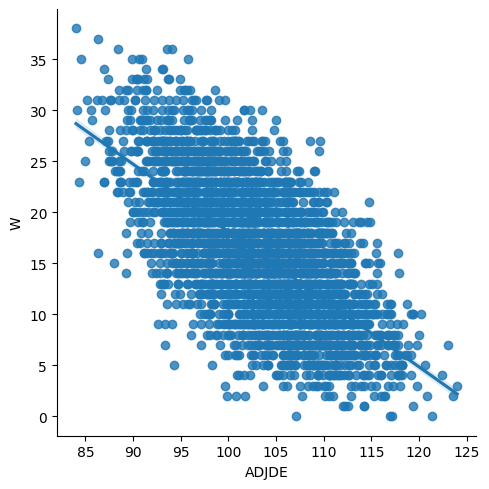

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x="ADJDE", y="W", data=dfdrop, order=1)
plt.show()

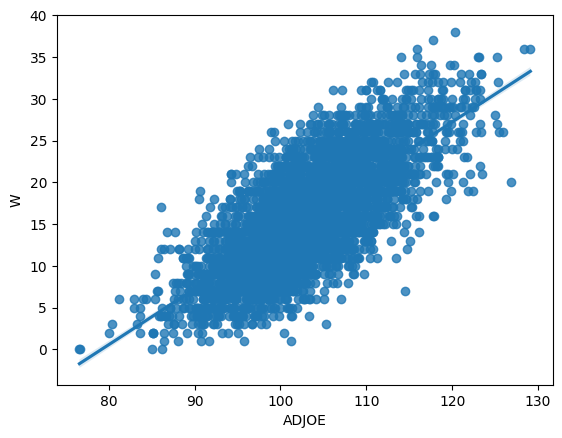

In [19]:
sns.regplot(x="ADJOE", y="W", data=dfdrop)
plt.show()

<Axes: xlabel='2P_O', ylabel='W'>

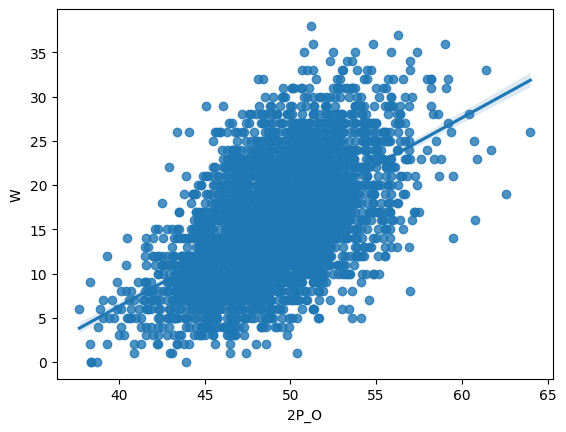

In [20]:
sns.regplot(x="2P_O", y="W", data=dfdrop, x_ci='sd')

In [21]:
from sklearn.ensemble import RandomForestRegressor

randfor = RandomForestRegressor(n_estimators=500, random_state=42)

randfor.fit(X_train, y_train)

r2 = r2_score(y_test, randfor.predict(X_test))
print('Coeficiente de determinación R^2: ', r2)

Coeficiente de determinación R^2:  0.7854691949774303


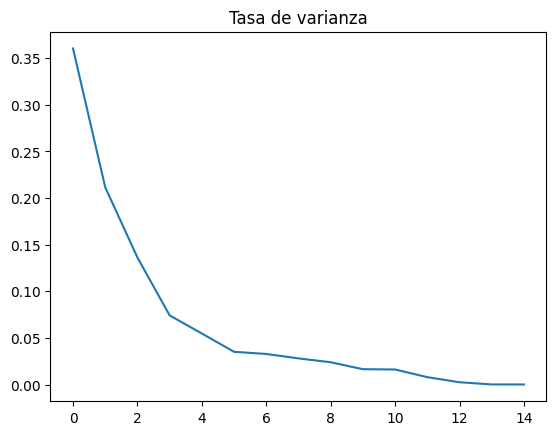

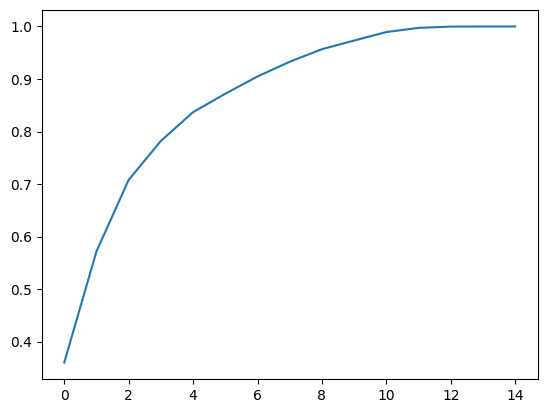

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X_train)

plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.title("Tasa de varianza")
plt.show()
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
plt.figure()

In [23]:
componentes=8 #?
print("con ", componentes, "componentes tenemos el ",np.cumsum(pca.explained_variance_ratio_)[componentes],"De la varianza explicada")

con  8 componentes tenemos el  0.9567566097252111 De la varianza explicada


In [24]:
pca2 = PCA(n_components=componentes)
pca2.fit(X_train)
X_train_pca=pca2.transform(X_train)
X_test_pca=pca2.transform(X_test)

In [25]:
modelo.fit(X_train_pca, y_train)

y_pred=modelo.predict(X_test_pca)

r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinación R^2: ', r2)

Coeficiente de determinación R^2:  0.7429567888833357


**R^2**

Sin PCA: 0.8215022432485913\
Con PCA: 0.7429567888833357

In [32]:
print("Subir CSV con estadísticas:")

df_entrada=pd.read_csv(files.upload())

Subir CSV con estadísticas:


Saving Datos prueba.csv to Datos prueba.csv


ValueError: ignored